In [11]:
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
CITY_DATA = { 'chicago': 'chicago.csv',
              'new york': 'new_york_city.csv',
              'washington': 'washington.csv' }

Hello! Let's explore some US bikeshare data!

Would you like to see data for Chicago, New York or Washington?
NO
Invalid input. Please try again

Would you like to see data for Chicago, New York or Washington?
Chicago

Which month? January, February, March, April, May, June or all?
January

Which day ? Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday or all
Tuesday
----------------------------------------
Start to load data from chicago.csv ...

Calculating The Most Frequent Times of Travel...

Most Common Month:  1
Most Common day of week:  Tuesday
Most Frequent Start Hour:  17

This took 0.044295549392700195 seconds.
----------------------------------------

Calculating The Most Popular Stations and Trip...

Most commonly used start station: Clinton St & Washington Blvd
Most commonly used end station: Clinton St & Washington Blvd
Most frequent combination stations, start from
LaSalle St & Jackson Blvd 
to
Canal St & Madison St

This took 0.0 seconds.
-------------------

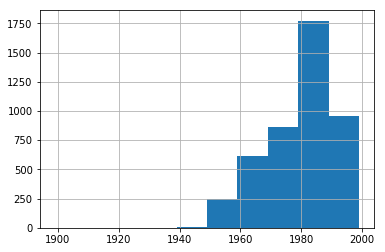


This took 1.8003497123718262 seconds.
----------------------------------------


In [ ]:
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.
    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    
    invalid = "Invalid input. Please try again" 
    
    print('Hello! Let\'s explore some US bikeshare data!')
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    while True:
        city = input("\nWould you like to see data for Chicago, New York or Washington?\n").lower()
        if city in ['chicago', 'new york', 'washington']:
            break
        else:
            print(invalid)
    
    # TO DO: get user input for month (all, january, february, ... , june)
    while True:
        month = input("\nWhich month? January, February, March, April, May, June or all?\n").lower()
        if month in ["january", "february", "march", "april", "may", "june", "all"]:
            break
        else:
            print(invalid)

    # TO DO: get user input for day of week (all, monday, tuesday, ... sunday)
    while True:
        day = input("\nWhich day ? Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday or all\n").lower()
        if day in ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "all"]:
            break
        else:
            print(invalid)

    print('-'*40)
    return city, month, day


def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    file_name = CITY_DATA[city]
    print ("Start to load data from " + file_name + " ...")
    df = pd.read_csv(file_name)

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(arg=df['Start Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

    # filter by month if applicable
    if month != 'all':
        # extract month and day of week from Start Time to create new columns
        df['month'] = df['Start Time'].dt.month

        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1

        # filter by month to create the new dataframe
        df = df.loc[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
        df['day_of_week'] = df['Start Time'].dt.weekday_name

        # filter by day of week to create the new dataframe
        df = df.loc[df['day_of_week'] == day.title()]

    return df


def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # 1. convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(arg=df['Start Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

    # 2. extract hour from the Start Time column to create an hour column
    month = df['Start Time'].dt.month

    # 2.1
    weekday_name = df['Start Time'].dt.weekday_name

    # 2.2
    hour = df['Start Time'].dt.hour

    # 3. Display the most common month
    most_common_month = month.mode()[0]
    print('Most Common Month: ', most_common_month)

    # 3.1 Display the most common day of week
    most_common_day_of_week = weekday_name.mode()[0]
    print('Most Common day of week: ', most_common_day_of_week)

    # 3.2 Display the most common start hour
    popular_hour = hour.mode()[0]
    print('Most Frequent Start Hour: ', popular_hour)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # display most commonly used start station
    print ('Most commonly used start station:', df['Start Station'].value_counts().idxmax())

    # display most commonly used end station
    print ('Most commonly used end station:', df['End Station'].value_counts().idxmax())

    # display most frequent combination of start station and end station trip
    combine_stations = df['Start Station'] + "*" + df['End Station']
    most_freq_combination = combine_stations.value_counts().idxmax()
    print ('Most frequent combination stations, start from\n{} \nto\n{}'.format(most_freq_combination.split('*')[0], most_freq_combination.split('*')[1]))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    def print_secs_to_readable_time_format(seconds):
        m, s = divmod(seconds, 60)
        h, m = divmod(m, 60)
        d, h = divmod(h,24)
        y, d = divmod(d,365)
        print('Years: {}, Days: {}, Hours: {}, Mins: {}, Secs: {}'.format(y,d,h,m,s))

    # display total travel time
    total_travel_time = df['Trip Duration'].sum()
    print ('Total travel time:\n')
    print_secs_to_readable_time_format(total_travel_time)

    # display mean travel time
    mean_travel_time = df['Trip Duration'].mean()
    print ('\nMean travel time: {} seconds'.format(mean_travel_time))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    user_types = df['User Type'].value_counts()
    print(user_types)

    # Display counts of gender
    if 'Gender' in df.columns:
        gender_counts = df['Gender'].value_counts()
        print(gender_counts)

    # Display earliest, most recent, and most common year of birth
    if 'Birth Year' in df.columns:
        earliest_year = df['Birth Year'].min()
        most_recent_year = df['Birth Year'].max()
        most_common_birth_year = df['Birth Year'].mode()[0]
        print("\nEarliest year of birth: " + str(earliest_year))
        print("\nMost recent year of birth: " + str(most_recent_year))
        print("\nMost common year of birth: " + str(most_common_birth_year))
        df['Birth Year'].hist()
        plt.show()
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
    

def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()